## Assignment: Applying Model Evaluation Techniques


**Objective:** Apply the model evaluation concepts learned in this notebook to a new dataset and task. You will practice data loading, model training, evaluating performance using appropriate metrics, and utilizing cross-validation.

**Dataset:** [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)



**Task:**

1.  **Data Exploration:**
    *   Perform basic exploratory data analysis (EDA) to understand the data structure, identify missing values, and visualize key features (e.g., distributions, relationships).
2.  **Data Preprocessing:**
    *   Handle missing values (e.g., imputation, dropping rows/columns).
    *   Encode categorical features if necessary
    *   Split the data into training and testing sets.
3.  **Model Selection and Training:**
    *   Choose at least one appropriate model (e.g., Logistic Regression, SVM, Decision Tree).
    *   Train the selected model(s) on the training data.
4.  **Model Evaluation (Initial):**
    *   Evaluate the trained model(s) on the test set using the appropriate metrics covered in this notebook: Accuracy, Precision, Recall, F1-score, Confusion Matrix (visualize the confusion matrix), AUC.
    *   Discuss the initial performance based on these metrics.
5.  **Cross-Validation:**
    *   Implement K-Fold Cross-Validation (e.g., with k=5 or 10) on your chosen model and the full dataset.
    *   Calculate and report the mean and standard deviation of the cross-validation scores.
    *   Compare the performance estimate from cross-validation to the initial evaluation on the single test split.
6.  **Interpretation and Conclusion:**
    *   Summarize your findings. What do the evaluation metrics tell you about your model's performance?
    *   Discuss any challenges encountered and potential next steps (e.g., feature engineering, trying different models, hyperparameter tuning).

**Deliverables:**

*   A Jupyter Notebook containing all the code used for data loading, preprocessing, model training, and evaluation. Ensure your code is well-commented.
*   Include markdown cells explaining your steps, observations, and interpretations of the results and evaluation metrics.
*   Include visualizations where appropriate (e.g., confusion matrix heatmap, scatter plot of actual vs. predicted values for regression).
*   A brief written summary (can be within the notebook) outlining your key findings, the performance of your model(s), and reflections on the evaluation process.


# Loading dataset

In [5]:
# Download latest version
import kagglehub
path = kagglehub.dataset_download("uciml/mushroom-classification")
dataset_path = "/".join((path, "mushrooms.csv"))

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mushroom-classification' dataset.
Path to dataset files: /kaggle/input/mushroom-classification


In [6]:
import pandas as pd
df = pd.read_csv(dataset_path)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploring dataset (EDA)

In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# Display descriptive statistics of the dataset
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [9]:
# Check for missing values
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


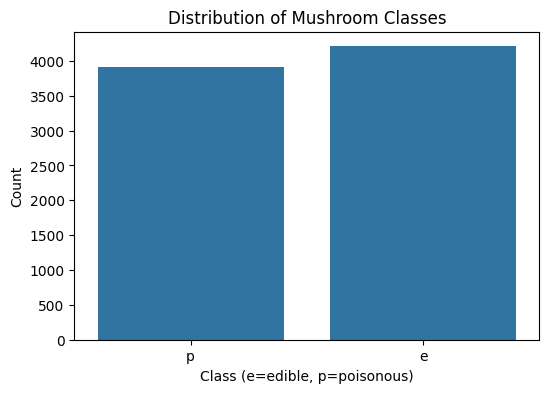

In [10]:
# Visualize the distribution of the target variable ('class')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class (e=edible, p=poisonous)')
plt.ylabel('Count')
plt.show()

We can see that we have no missing values and that the target feature class is well distributed, and also all our features are categorical, zero numerical features

# Outliers

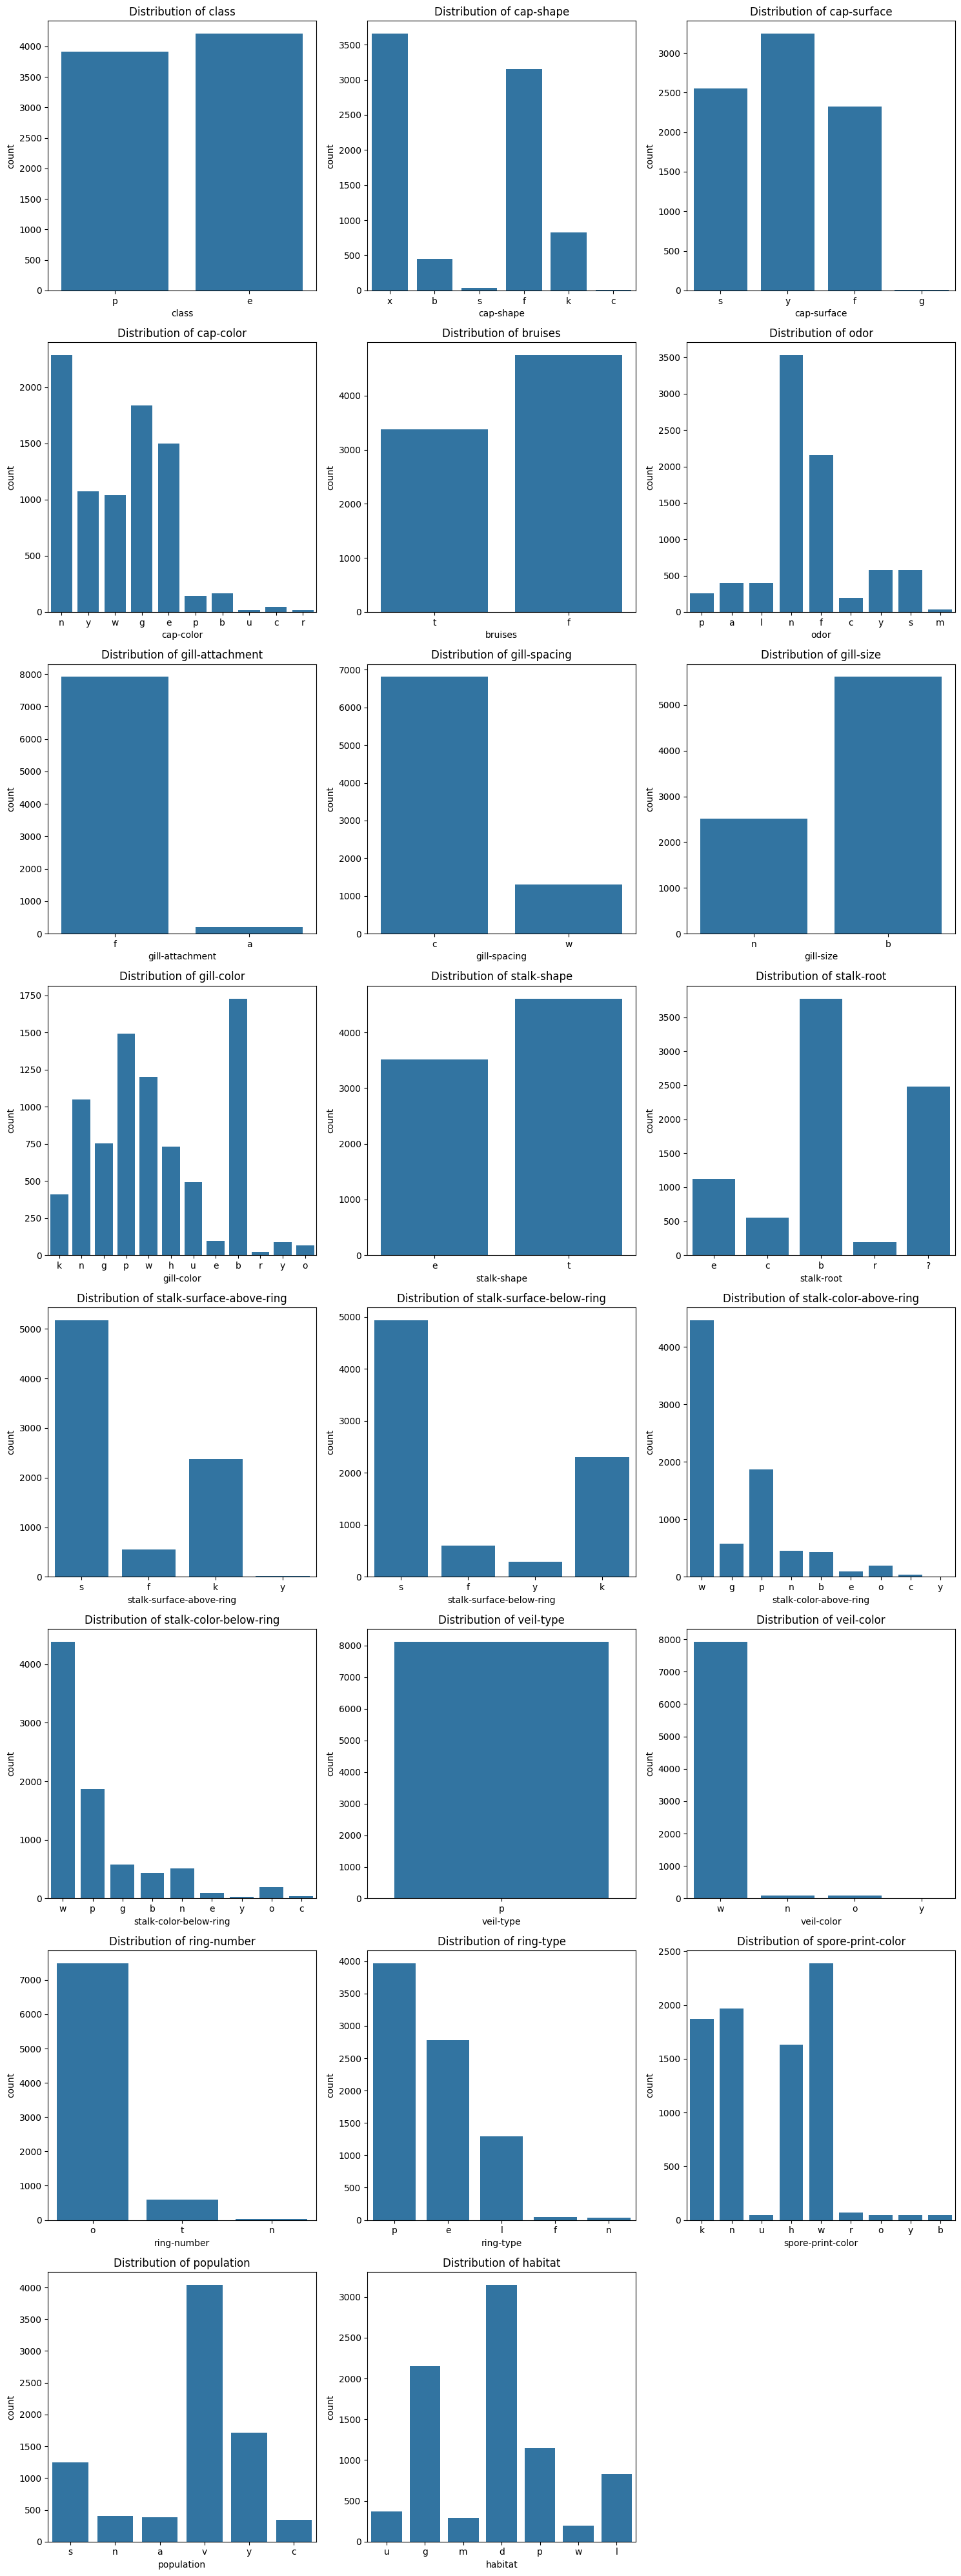

In [11]:
# Let`s display the distribution of the values for each features
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.columns.tolist()
# Exclude 'dataset' and 'age_range' as they have many unique values or have been visualized differently
cols_to_plot = [col for col in categorical_cols if col not in ['dataset', 'age_range', 'id']]

# Calculate the number of rows and columns for subplots
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

We can see that for veil_type we have a single value, therefore it is useless for our model training

In [12]:
df_clean = df.drop(['veil-type'], axis=1)

# Encoding features

## Label Encoding

In [13]:
# for the moment we`ll use StandarScaler() as we dont have any features whose values order would matter
# even though we have features like : cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s which would matter, considering mushrooms

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_label_encoded = pd.DataFrame()
for col in df_clean.columns:
    df_label_encoded[col] = label_encoder.fit_transform(df_clean[col])
df_label_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,...,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,...,1,4,2,3,5
1,0,5,2,9,1,...,1,4,3,2,1
2,0,0,2,8,1,...,1,4,3,2,3
3,1,5,3,8,1,...,1,4,2,3,5
4,0,5,2,3,0,...,1,0,3,0,1


## One Hot Encoding

In [14]:
columns = df_clean.columns.tolist()
columns.remove('class')
df_onehot_encoded = pd.get_dummies(df_clean, columns=columns, dtype=int)

# Analysing relationships

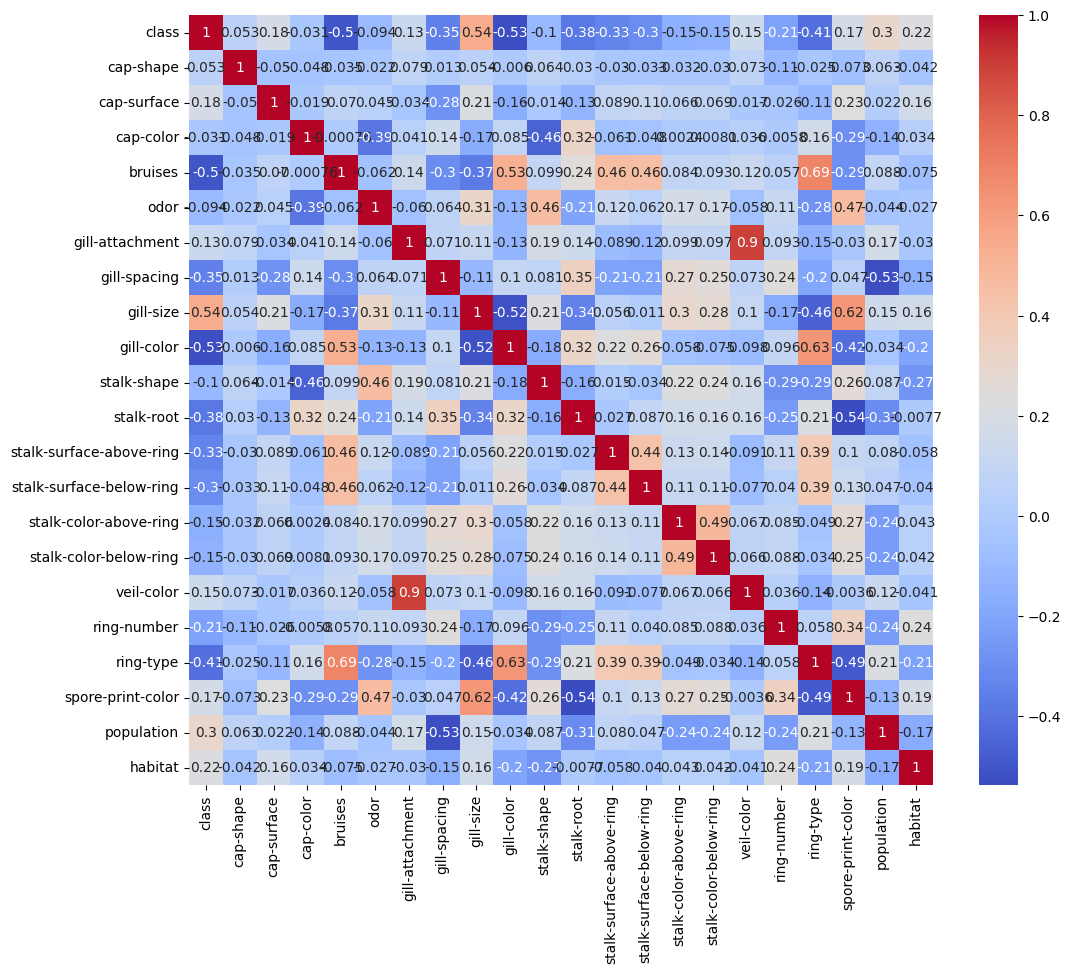


Top absolute correlations with 'class':
class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
Name: class, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_label_encoded.corr()
plt.figure(figsize=(12, 10)) # Increased figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Get absolute correlations with the target variable 'class' and sort them
class_corr_abs = corr_matrix['class'].abs().sort_values(ascending=False)
print("\nTop absolute correlations with 'class':")
print(class_corr_abs)

# Splitting data

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = df_label_encoded.drop('class', axis=1)
y = df_label_encoded['class']

X_OH = df_onehot_encoded.drop('class', axis=1)
y_OH = df_onehot_encoded['class']

X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(X_OH, y_OH, test_size=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# If you want to try label encoding insted of one hot encoding just uncomment this :)
# X_train_OH, X_test_OH, y_train_OH, y_test_OH = X_train, X_test, y_train, y_test

# Models

## Logistic Regression Model - all features

In [50]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [51]:
print("Shape of X_train_OH", X_train_OH.shape)
print("Shape of y_train_OH:", y_train_OH.shape)

Shape of X_train_OH (7311, 116)
Shape of y_train_OH: (7311,)


In [52]:
# Logistic regression with a single predictor
model = LogisticRegression()
model.fit(X_train_OH, y_train_OH)

LogisticRegression()

In [53]:
# Train a Logistic Regression model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_OH = model.predict(X_test_OH)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_OH, y_pred_OH)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


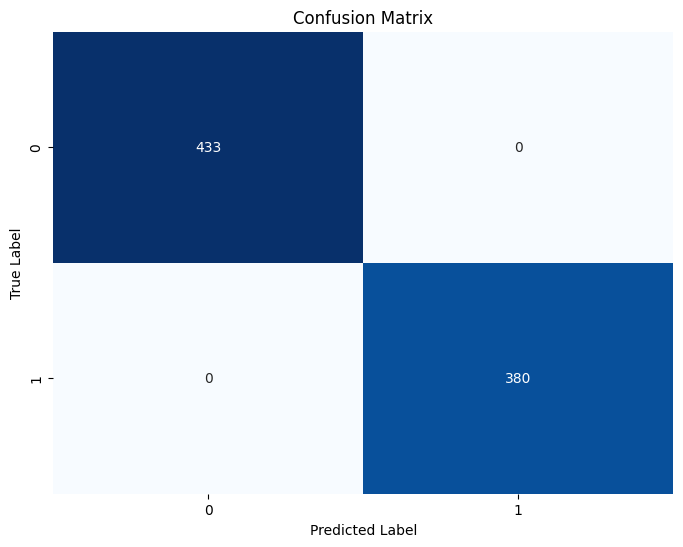

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Confusion Matrix


def plot_cm(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Visualize the Confusion Matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

plot_cm(y_test_OH, y_pred_OH)

## Logistic Regression Model - single predictor

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [23]:
X_train_single_predictor = X_train[['gill-size']]
X_test_single_predictor = X_test[['gill-size']]


print("Shape of X_train", X_train_single_predictor.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train (7311, 1)
Shape of y_train: (7311,)


In [24]:
# Logistic regression with a single predictor
single_predictor_logistic_model = LogisticRegression()
single_predictor_logistic_model.fit(X_train_single_predictor, y_train)

LogisticRegression()

In [25]:
single_predictor_intercept = single_predictor_logistic_model.intercept_[0]
single_predictor_coef = single_predictor_logistic_model.coef_[0][0]

print("Single predictor logistic regression model:")
print(f"Intercept: {single_predictor_intercept:.6f}")
print(f"Coefficient: {single_predictor_coef:.6f}")

Single predictor logistic regression model:
Intercept: -0.833929
Coefficient: 2.896996


In [26]:
# Train a Logistic Regression model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_single = single_predictor_logistic_model.predict(X_test_single_predictor)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_single)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7515


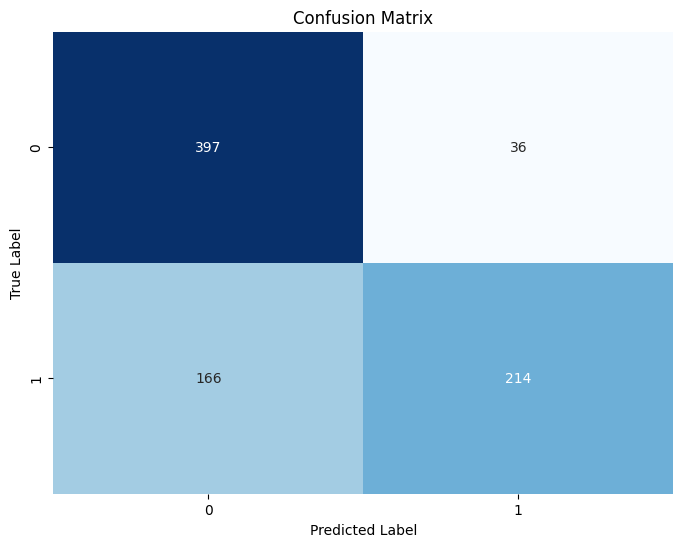

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Confusion Matrix


def plot_cm(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Visualize the Confusion Matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

plot_cm(y_test, y_pred_single)

## Log Regr Two Predictors

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Split into training and test sets
X_train_duo = X_train[['gill-color', 'habitat']]
X_test_duo = X_test[['gill-color', 'habitat']]

# Train a Logistic Regression model
model = SVC(C=1.0, kernel='rbf')
model.fit(X_train_duo, y_train)

# Make predictions on the test set
y_pred_duo = model.predict(X_test_duo)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_duo)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8143


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-2580699832.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, edgecolor='k', s=60, label=class_labels[i])


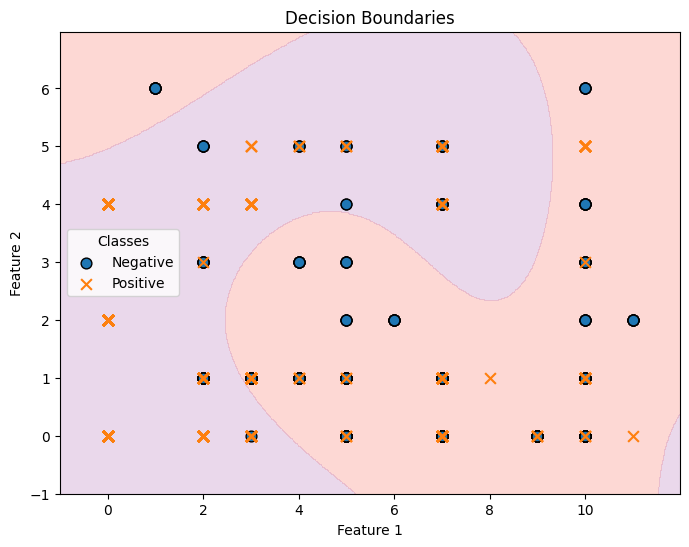

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(X, y, model, class_labels=None):
  # Convert DataFrame to NumPy array if it is a DataFrame
  if isinstance(X, pd.DataFrame):
    X = X.values

  n_classes = len(np.unique(y))

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  # The model's predict method might also expect a NumPy array
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, Z, alpha=0.3,
                 levels=np.arange(n_classes+1)-0.5,  # center boundaries between class labels
                 cmap=plt.cm.Set3)
  markers = ['o', 'x', '*', 's', 'D']

  if class_labels is None:
    class_labels = [f"Class {i}" for i in range(n_classes)]

  # Plot points - also convert y to NumPy array if it's a Series
  if isinstance(y, pd.Series):
      y = y.values

  for i, marker in zip(range(n_classes), markers * ((n_classes // len(markers)) + 1)):
      plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, edgecolor='k', s=60, label=class_labels[i])

  plt.legend(title="Classes")
  plt.title("Decision Boundaries")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.show()

plot_decision_boundaries(X_test_duo, y_test, model, class_labels=["Negative", "Positive"])

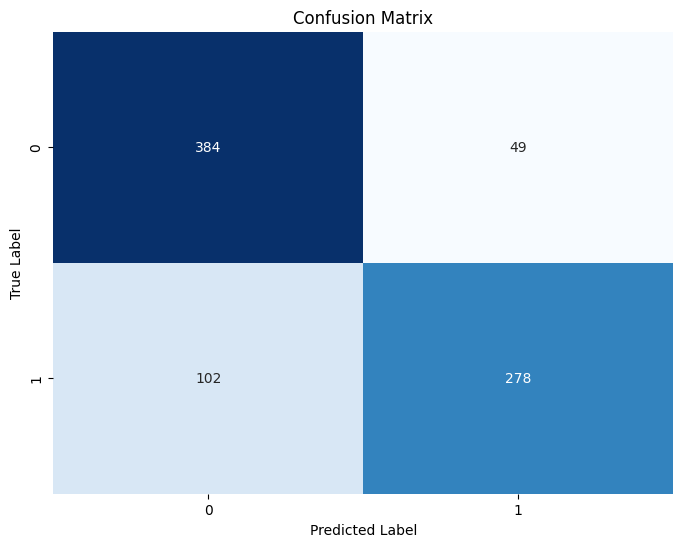

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Confusion Matrix


def plot_cm(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Visualize the Confusion Matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

plot_cm(y_test, y_pred_duo)

## Evaluation metrics

### Precision

In [31]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_single)
print(f"Precision for single predictor: {precision:.4f}")

precision = precision_score(y_test, y_pred_duo)
print(f"Precision for two predictors: {precision:.4f}")

Precision for single predictor: 0.8560
Precision for two predictors: 0.8502


### Recall

In [32]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred_single)
print(f"Recall for single predictor: {recall:.4f}")

recall = recall_score(y_test, y_pred_duo)
print(f"Recall for two predictors: {recall:.4f}")

Recall for single predictor: 0.5632
Recall for two predictors: 0.7316


### F1 Score

In [33]:
from sklearn.metrics import f1_score

# Calculate and print the F1-score
f1 = f1_score(y_test, y_pred_single)
print(f"F1-score single predictor: {f1:.4f}")

f1 = f1_score(y_test, y_pred_duo)
print(f"F1-score two predictors: {f1:.4f}")

F1-score single predictor: 0.6794
F1-score two predictors: 0.7864


In our case, the recall is the most important because missing a poisonous mushroom would be very dangerous
Although, for these 2 models, the one with two predictors has better results on all scores.

### AUC

Foor the first predictor model:

AUC: 0.7400


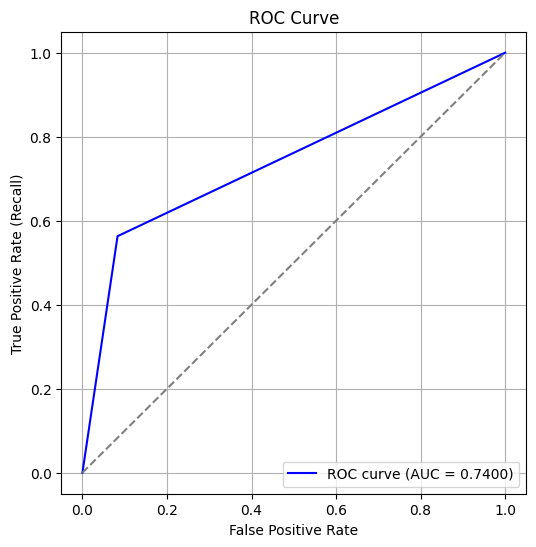

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

model_prob = SVC(C=1.0, kernel='rbf', probability=True)
model_prob.fit(X_train_single_predictor, y_train)

# Get predicted probabilities for the positive class
y_scores = model_prob.predict_proba(X_test_single_predictor)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

For the two predictors model:

AUC: 0.8676


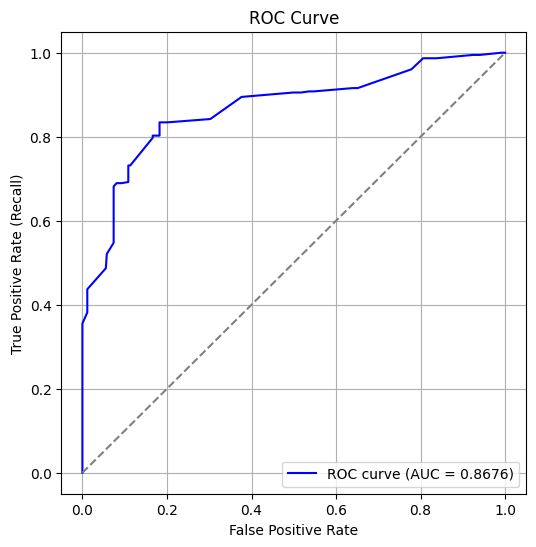

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

model_prob = SVC(C=1.0, kernel='rbf', probability=True)
model_prob.fit(X_train_duo, y_train)

# Get predicted probabilities for the positive class
y_scores = model_prob.predict_proba(X_test_duo)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

For the One Hot encoded data and all features model:

AUC: 1.0000


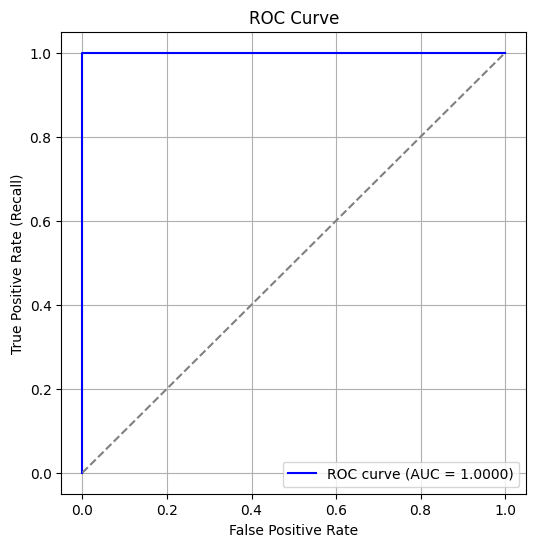

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

model_prob = SVC(C=1.0, kernel='rbf', probability=True)
model_prob.fit(X_train_OH, y_train_OH)

# Get predicted probabilities for the positive class
y_scores = model_prob.predict_proba(X_test_OH)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line = random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

We can observe that the value of the two predictors model is higher than the one with only one feature, also from the ROC curve we can see that for the two predictors model it is less inclined and goes farther from diagonal.
The model with accuracy 1 will be ignored, because we already know it`s enough so we dont have errors to analyze.

## Regression Metrics

We`ve already noticed that the two predictors model is better, therefore we ll only analize it.

### Mean absolute error (MAE)

In [37]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_duo)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.1857


### Mean Squared Error (MRE)

In [38]:
from sklearn.metrics import mean_squared_error

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_duo)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.1857


### Root Mean Squared Error (RMSE)

In [39]:
from sklearn.metrics import root_mean_squared_error

# Calculate and print the Root Mean Squared Error (RMSE)
mse = root_mean_squared_error(y_test, y_pred_duo)
print(f"Root mean Squared Error (RMSE): {mse:.4f}")

Root mean Squared Error (RMSE): 0.4310


### $R^2$ (Coefficient of Determination)

In [40]:
from sklearn.metrics import r2_score

# Calculate and print the R^2 score
r2 = r2_score(y_test, y_pred_duo)
print(f"R^2 score: {r2:.4f}")

R^2 score: 0.2539


# K Fold Cross-Validation

In [41]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict

# Re-initialize the Logistic Regression model (untrained)
model_cv = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform 5-fold cross-validation using r2 as the scoring metric on the full dataset
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the mean and standard deviation
print(f"Mean Cross-validation score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-validation score: {std_cv_score:.4f}")

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

Mean Cross-validation score: 0.9519
Standard Deviation of Cross-validation score: 0.0074
Cross-validation scores for each fold: [0.95686907 0.95994985 0.94146517 0.94454595 0.95683341]


R² on test set: 0.7880089680928847


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


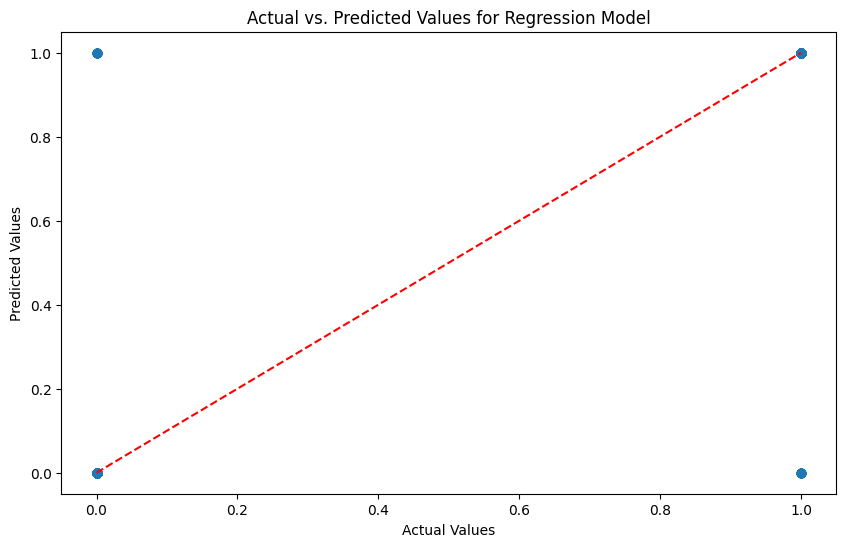

In [42]:
import matplotlib.pyplot as plt
import numpy as np

final_model = LogisticRegression().fit(X_train, y_train)

y_pred = final_model.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print("R² on test set:", test_r2)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line
# Determine the range for the diagonal line based on the data
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Regression Model')

# Display the plot
plt.show()

# Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid for SVR with fewer and simpler parameters
param_grid = {
    'C': [0.1, 1, 10],  # Reduced regularization parameters
    'gamma': ['scale', 'auto'], # Reduced kernel coefficients
    'kernel': ['rbf', 'linear']       # Reduced kernel types
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the training data
# Assuming X_train, y_train are already defined from a previous split
# If not, you would need to split your data first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['gill-color', 'gill-size']], y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found by Grid Search: {grid_search.best_params_}")
print(f"Best cross-validation score (negative MSE): {grid_search.best_score_}")

# You can access the best model directly
best_svr_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.5s
[CV] END ......................C=0.1, gamma=auto


Mean Squared Error on test set with best parameters: 0.1431


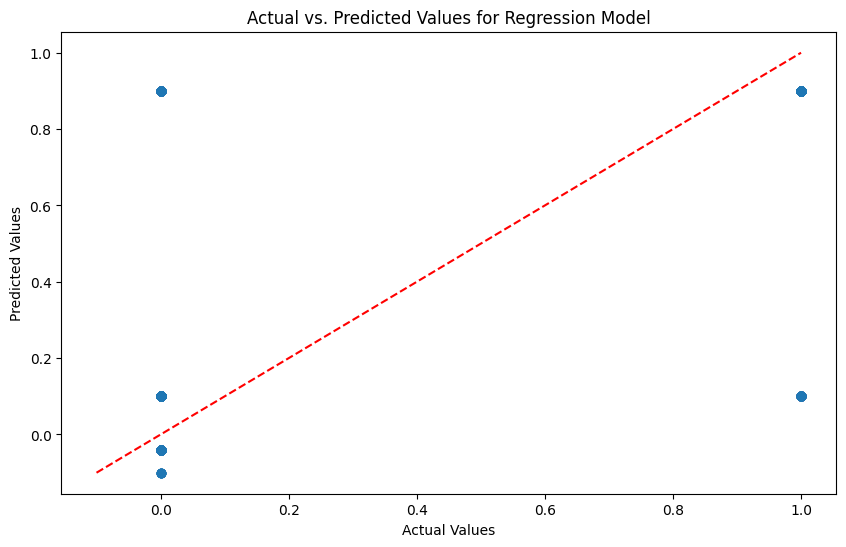

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set using the trained model
y_pred = best_svr_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on test set with best parameters: {test_mse:.4f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line representing perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Regression Model')
plt.show()

Mean Squared Error on Test Set: 0.1431
Mean Absolute Error on Test Set: 0.2279
R-squared on Test Set: 0.4270


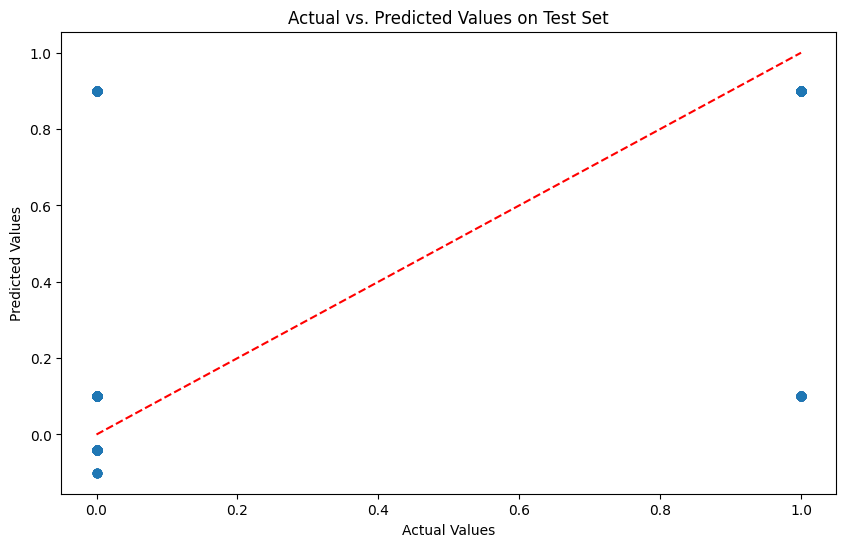

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming best_svr_model_random, X_test, and y_test are already defined from the previous cell


# Evaluate the model using regression metrics
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {test_mse:.4f}")
print(f"Mean Absolute Error on Test Set: {test_mae:.4f}")
print(f"R-squared on Test Set: {test_r2:.4f}")

# You can also visualize the predictions vs actuals as you did before
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values on Test Set')
plt.show()

# Randomized Search Cross-Validation

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=37.454011884736246, gamma=0.3010121430917521, kernel=rbf; total time=   0.8s
[CV] END C=37.454011884736246, gamma=0.3010121430917521, kernel=rbf; total time=   0.6s
[CV] END C=37.454011884736246, gamma=0.3010121430917521, kernel=rbf; total time=   0.8s
[CV] END C=37.454011884736246, gamma=0.3010121430917521, kernel=rbf; total time=   0.6s
[CV] END C=37.454011884736246, gamma=0.3010121430917521, kernel=rbf; total time=   0.8s
[CV] END C=77.96910002727692, gamma=0.09084469696321254, kernel=linear; total time=  23.7s
[CV] END C=77.96910002727692, gamma=0.09084469696321254, kernel=linear; total time=  19.8s
[CV] END C=77.96910002727692, gamma=0.09084469696321254, kernel=linear; total time=  23.3s
[CV] END C=77.96910002727692, gamma=0.09084469696321254, kernel=linear; total time=  26.9s
[CV] END C=77.96910002727692, gamma=0.09084469696321254, kernel=linear; total time=  22.1s
[CV] END C=15.599452033620265, gamma=0.00598

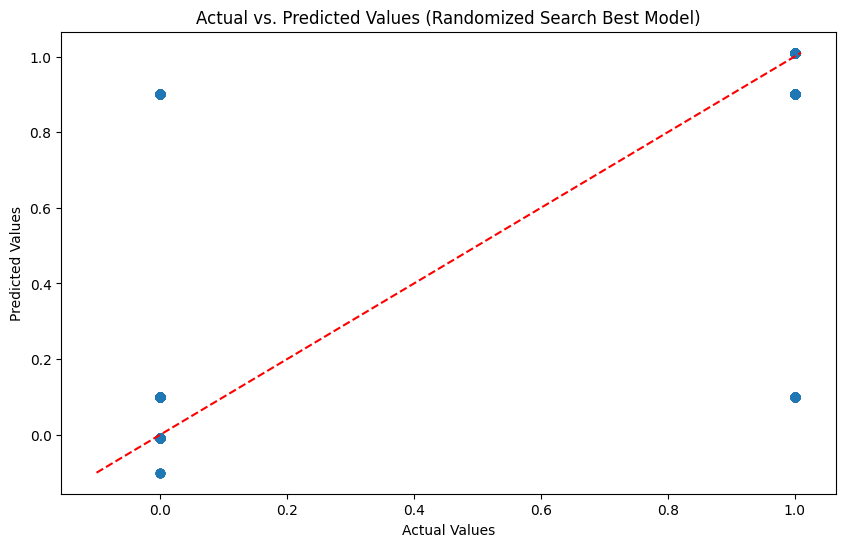

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, expon
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are your full feature and target datasets
# If not, you would need to load and preprocess your data first

# Define the parameter distribution for SVR
# Using distributions for a more "randomized" search
param_dist = {
    'C': uniform(loc=0, scale=100),  # Uniform distribution between 0 and 1000
    'gamma': expon(scale=.1),        # Exponential distribution with scale 0.1
    'kernel': ['rbf', 'linear'] # Discrete values for kernel
}

# Initialize the SVR model
svr = SVR()

# Initialize RandomizedSearchCV with 5-fold cross-validation and specify the number of iterations
n_iter_search = 10  # Reduce iterations to sample fewer combinations
random_search = RandomizedSearchCV(svr, param_dist, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found by Randomized Search:")
print(random_search.best_params_)
print("\nBest cross-validation score (negative MSE):")
print(random_search.best_score_)

# You can access the best model directly
best_svr_model_random = random_search.best_estimator_

# Evaluate the best model on the test set (if you have one)
y_pred_best_random = best_svr_model_random.predict(X_test)
test_mse_random = mean_squared_error(y_test, y_pred_best_random)
print(f"\nMean Squared Error on test set with best parameters from Randomized Search: {test_mse_random:.4f}")

# Create a scatter plot for the best randomized search model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_random, alpha=0.5)

# Add a diagonal line representing perfect predictions
min_val = min(min(y_test), min(y_pred_best_random))
max_val = max(max(y_test), max(y_pred_best_random))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Randomized Search Best Model)')
plt.show()

# Conclusions
The best model is the logistic regression using all of the features ( one hot encoded) achieving a clear accuracy of 1.
Looks like both the GridSearch and Randomized Search Cross-Validation produced almost the same error(0.1431 GridSearch vs 0.1409 RandomizedSearchCV), even though the best parameters found are not the same